In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df1=pd.read_csv('Zomate.csv')
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df2=pd.read_csv('Country_code.csv')
df2.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [4]:
df=pd.merge(df1,df2)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [5]:
df.shape

(9551, 22)

In [6]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [7]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
df.isnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [11]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le=LabelEncoder()
list1=['Restaurant Name',  'City', 'Address','Locality', 'Locality Verbose',  'Cuisines','Currency', 'Has Table booking','Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text','Country']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [12]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749,162,73,8685,171,172,121.027535,14.565443,920,...,1,0,0,0,3,4.8,0,1,314,6
1,6304287,3173,162,73,6055,593,601,121.014101,14.553708,1111,...,1,0,0,0,3,4.5,0,1,591,6
2,6300002,2897,162,75,4684,308,314,121.056831,14.581404,1671,...,1,0,0,0,4,4.4,1,5,270,6
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,0,4,4.9,0,1,365,6
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,1,0,0,0,4,4.8,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,5926,517,523,28.977392,41.022793,1813,...,0,0,0,0,3,4.1,1,5,788,11
9547,5908749,1311,208,140,5962,552,558,29.041297,41.009847,1824,...,0,0,0,0,3,4.2,1,5,1034,11
9548,5915807,3069,208,140,5966,554,561,29.034640,41.055817,1110,...,0,0,0,0,4,3.7,5,2,661,11
9549,5916112,513,208,140,5967,554,561,29.036019,41.057979,1657,...,0,0,0,0,4,4.0,1,5,901,11


In [13]:
df['Cuisines']=df['Cuisines'].fillna((df['Cuisines']).mean())
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749,162,73,8685,171,172,121.027535,14.565443,920,...,1,0,0,0,3,4.8,0,1,314,6
1,6304287,3173,162,73,6055,593,601,121.014101,14.553708,1111,...,1,0,0,0,3,4.5,0,1,591,6
2,6300002,2897,162,75,4684,308,314,121.056831,14.581404,1671,...,1,0,0,0,4,4.4,1,5,270,6
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,0,4,4.9,0,1,365,6
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,1,0,0,0,4,4.8,0,1,229,6


In [14]:
df.drop(['Switch to order menu'],axis=1,inplace=True)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749,162,73,8685,171,172,121.027535,14.565443,920,...,0,1,0,0,3,4.8,0,1,314,6
1,6304287,3173,162,73,6055,593,601,121.014101,14.553708,1111,...,0,1,0,0,3,4.5,0,1,591,6
2,6300002,2897,162,75,4684,308,314,121.056831,14.581404,1671,...,0,1,0,0,4,4.4,1,5,270,6
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,0,4,4.9,0,1,365,6
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,0,1,0,0,4,4.8,0,1,229,6


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   int32  
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   int32  
 4   Address               9551 non-null   int32  
 5   Locality              9551 non-null   int32  
 6   Locality Verbose      9551 non-null   int32  
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   int32  
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   int32  
 12  Has Table booking     9551 non-null   int32  
 13  Has Online delivery   9551 non-null   int32  
 14  Is delivering now     9551 non-null   int32  
 15  Price range          

In [16]:
df.describe()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.00000,...,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,3653.204586,18.365616,78.301434,4542.439430,658.128468,677.304994,64.126574,25.854381,989.95079,...,3.977699,0.121244,0.256622,0.003560,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,8.791521e+06,2142.917876,56.750546,23.198915,2565.717005,315.866515,331.727449,41.467058,11.007935,514.72354,...,0.914242,0.326428,0.436792,0.059561,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,5.300000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.00000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.019625e+05,1777.500000,1.000000,76.000000,2323.500000,381.000000,387.000000,77.081343,28.478713,497.00000,...,4.000000,0.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,6.004089e+06,3595.000000,1.000000,88.000000,4610.000000,696.000000,707.000000,77.191964,28.570469,1127.00000,...,4.000000,0.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,1.835229e+07,5485.500000,1.000000,88.000000,6746.500000,921.000000,953.000000,77.282006,28.642758,1355.00000,...,4.000000,0.000000,1.000000,0.000000,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,1.850065e+07,7445.000000,216.000000,140.000000,8917.000000,1207.000000,1264.000000,174.832089,55.976980,1825.00000,...,11.000000,1.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


In [17]:
df.skew()

Restaurant ID            0.061570
Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305484
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

<AxesSubplot:>

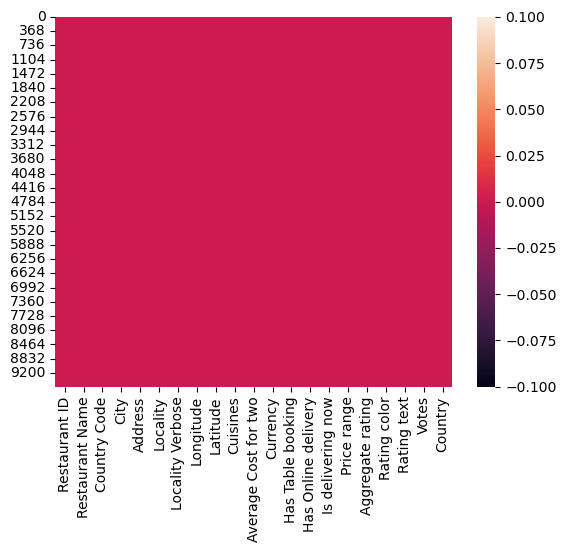

In [18]:
sns.heatmap(df.isnull())

In [19]:
dfcor=df.corr()
dfcor

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant ID,1.000000,0.003999,0.148471,-0.005844,0.080615,0.069511,0.070102,-0.226081,-0.052081,-0.077664,...,-0.121472,-0.110071,-0.085089,0.012548,-0.134540,-0.326212,0.130540,0.251114,-0.147023,0.161763
Restaurant Name,0.003999,1.000000,0.020012,-0.001399,0.000763,0.004323,0.004282,-0.001920,0.009922,0.051496,...,0.009669,0.041173,0.028082,0.011984,0.061275,0.029367,-0.007311,0.012131,0.018512,0.017560
Country Code,0.148471,0.020012,1.000000,-0.181728,-0.220342,-0.120075,-0.117543,-0.698299,0.019792,-0.129451,...,-0.033466,-0.061682,-0.154605,-0.018291,0.243327,0.282189,-0.187174,0.222685,0.154530,0.968700
City,-0.005844,-0.001399,-0.181728,1.000000,-0.019763,0.096444,0.093142,0.117391,-0.004301,0.025764,...,-0.071996,-0.003762,0.012723,-0.014039,-0.105759,-0.132163,0.110887,-0.098985,-0.078406,-0.180959
Address,0.080615,0.000763,-0.220342,-0.019763,1.000000,0.159555,0.160495,0.185801,-0.038654,0.022833,...,0.069499,0.006428,0.029874,0.031267,-0.034952,-0.151153,0.071264,-0.008030,-0.101754,-0.235815
Locality,0.069511,0.004323,-0.120075,0.096444,0.159555,1.000000,0.999465,0.086448,-0.020424,0.006499,...,0.023723,-0.065594,-0.030993,-0.007299,-0.114460,-0.174336,0.036832,-0.036970,-0.123569,-0.118784
Locality Verbose,0.070102,0.004282,-0.117543,0.093142,0.160495,0.999465,1.000000,0.084342,-0.020905,0.005482,...,0.022966,-0.065132,-0.031766,-0.007353,-0.112314,-0.173254,0.037104,-0.035431,-0.122877,-0.116406
Longitude,-0.226081,-0.001920,-0.698299,0.117391,0.185801,0.086448,0.084342,1.000000,0.043207,0.122457,...,0.337334,0.100488,0.178757,0.018787,-0.078939,-0.116818,0.059979,-0.181466,-0.085101,-0.766221
Latitude,-0.052081,0.009922,0.019792,-0.004301,-0.038654,-0.020424,-0.020905,0.043207,1.000000,0.038646,...,-0.101864,0.054658,0.118722,0.015001,-0.166688,0.000516,0.042590,-0.129447,-0.022962,0.181299
Cuisines,-0.077664,0.051496,-0.129451,0.025764,0.022833,0.006499,0.005482,0.122457,0.038646,1.000000,...,0.066783,0.050232,-0.017180,0.007708,-0.005489,-0.079494,-0.016180,-0.080025,-0.032362,-0.124141


<AxesSubplot:>

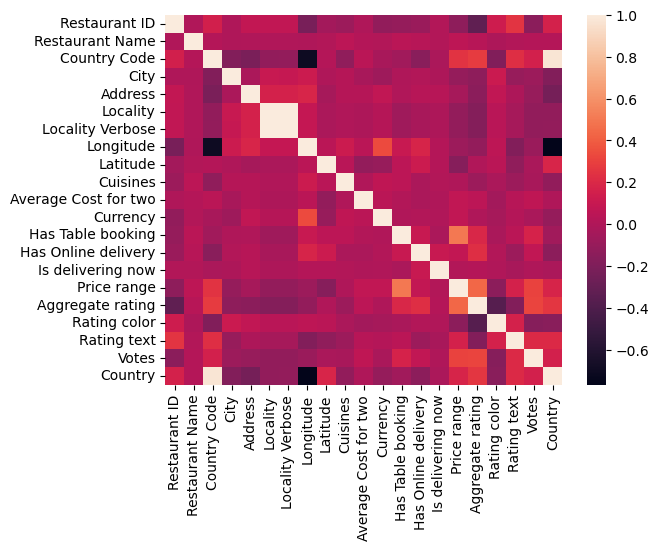

In [20]:
sns.heatmap(dfcor)

<AxesSubplot:>

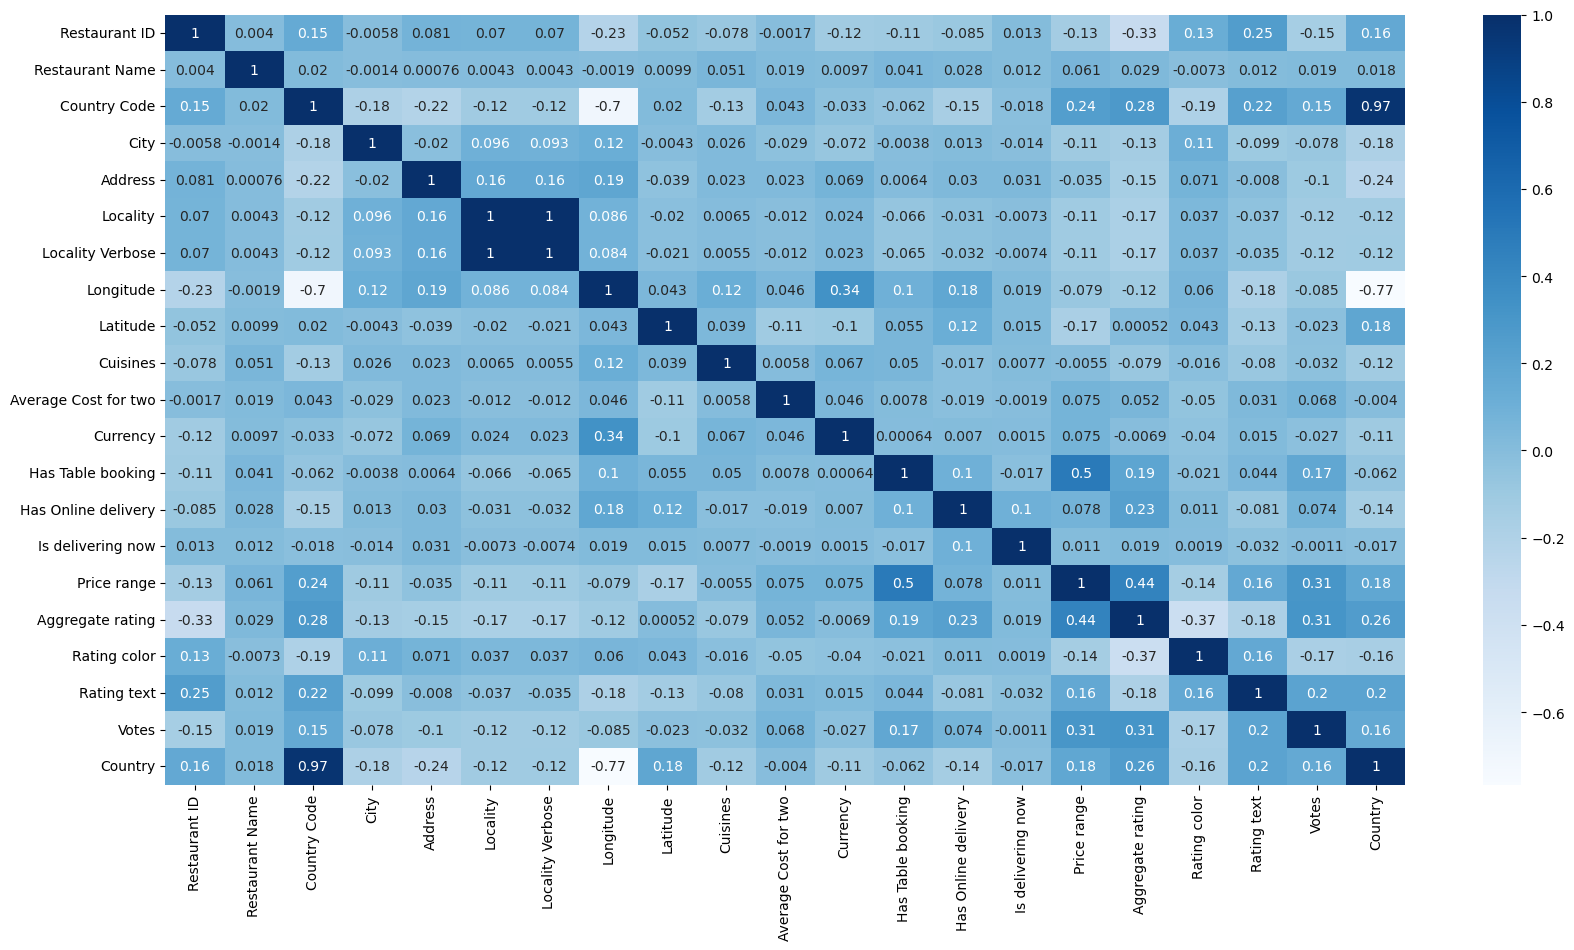

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,cmap='Blues',annot=True)

<AxesSubplot:>

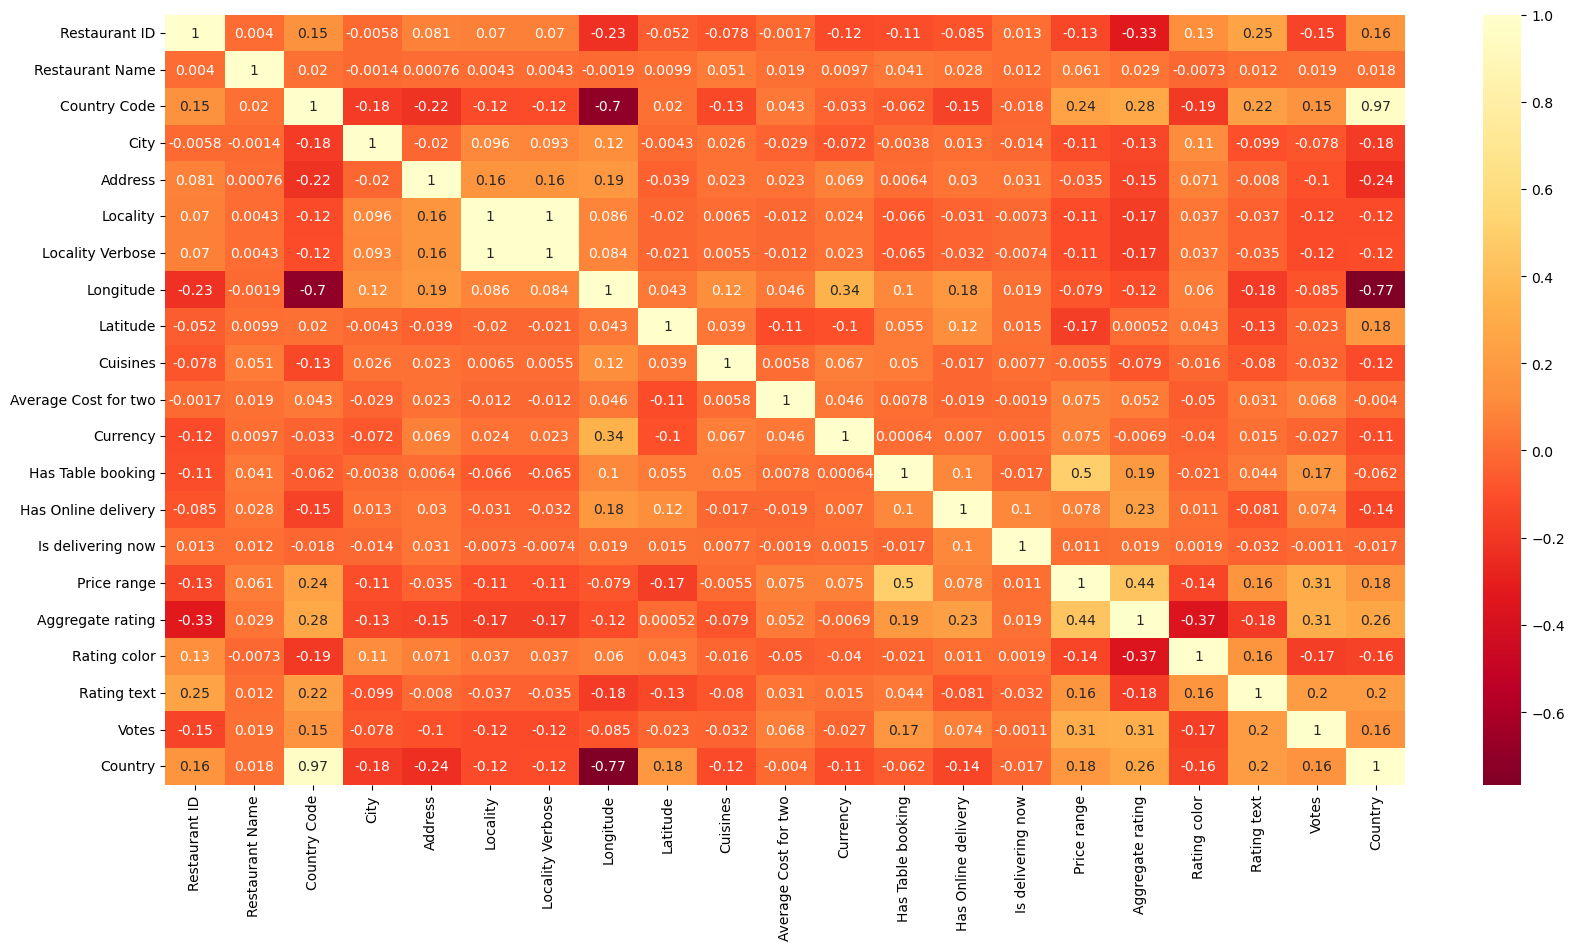

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

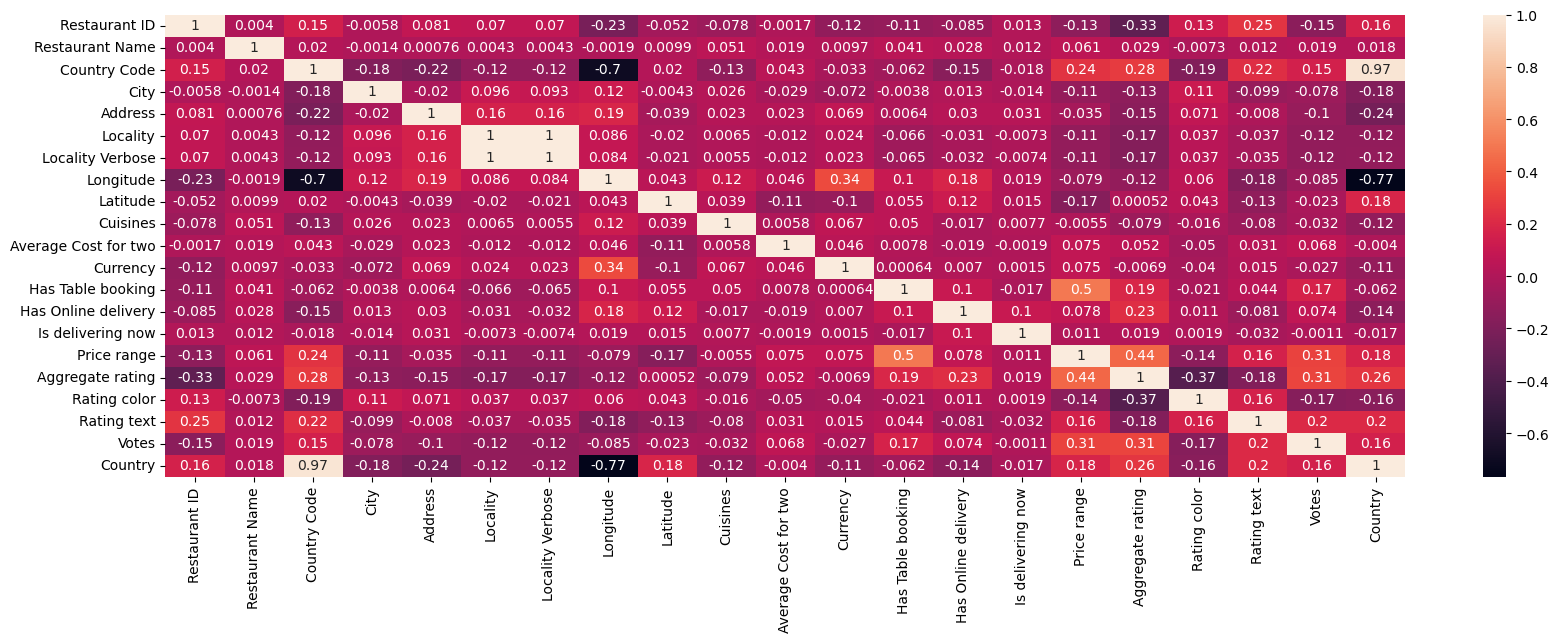

In [23]:
corr_hmap=df.corr()
plt.figure(figsize=(20,6))
sns.heatmap(corr_hmap,annot=True)
plt.show

Restaurant ID              AxesSubplot(0.125,0.712609;0.110714x0.167391)
Restaurant Name         AxesSubplot(0.257857,0.712609;0.110714x0.167391)
Country Code            AxesSubplot(0.390714,0.712609;0.110714x0.167391)
City                    AxesSubplot(0.523571,0.712609;0.110714x0.167391)
Address                 AxesSubplot(0.656429,0.712609;0.110714x0.167391)
Locality                AxesSubplot(0.789286,0.712609;0.110714x0.167391)
Locality Verbose           AxesSubplot(0.125,0.511739;0.110714x0.167391)
Longitude               AxesSubplot(0.257857,0.511739;0.110714x0.167391)
Latitude                AxesSubplot(0.390714,0.511739;0.110714x0.167391)
Cuisines                AxesSubplot(0.523571,0.511739;0.110714x0.167391)
Average Cost for two    AxesSubplot(0.656429,0.511739;0.110714x0.167391)
Currency                AxesSubplot(0.789286,0.511739;0.110714x0.167391)
Has Table booking           AxesSubplot(0.125,0.31087;0.110714x0.167391)
Has Online delivery      AxesSubplot(0.257857,0.310

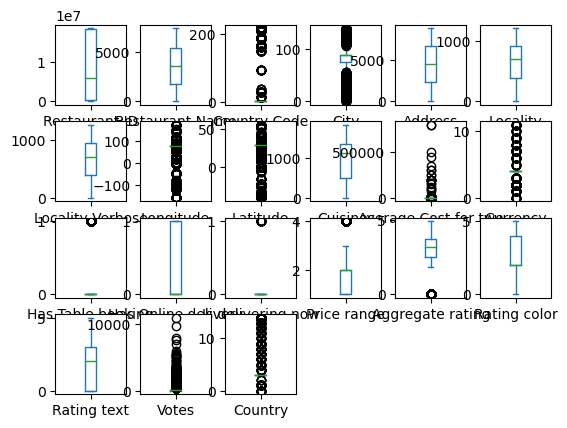

In [24]:
df.plot(kind='box',subplots=True,layout=(4,6))

Restaurant ID              AxesSubplot(0.125,0.712609;0.110714x0.167391)
Restaurant Name         AxesSubplot(0.257857,0.712609;0.110714x0.167391)
Country Code            AxesSubplot(0.390714,0.712609;0.110714x0.167391)
City                    AxesSubplot(0.523571,0.712609;0.110714x0.167391)
Address                 AxesSubplot(0.656429,0.712609;0.110714x0.167391)
Locality                AxesSubplot(0.789286,0.712609;0.110714x0.167391)
Locality Verbose           AxesSubplot(0.125,0.511739;0.110714x0.167391)
Longitude               AxesSubplot(0.257857,0.511739;0.110714x0.167391)
Latitude                AxesSubplot(0.390714,0.511739;0.110714x0.167391)
Cuisines                AxesSubplot(0.523571,0.511739;0.110714x0.167391)
Average Cost for two    AxesSubplot(0.656429,0.511739;0.110714x0.167391)
Currency                AxesSubplot(0.789286,0.511739;0.110714x0.167391)
Has Table booking           AxesSubplot(0.125,0.31087;0.110714x0.167391)
Has Online delivery      AxesSubplot(0.257857,0.310

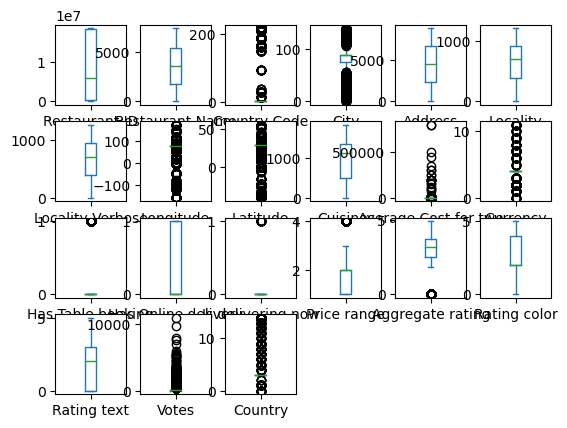

In [25]:
df.plot(kind='box',subplots=True,layout=(4,6))

In [26]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.310940,0.044706,2.531111,0.228533,1.614667,1.542278,1.523333,1.372269,1.025581,0.135907,...,4.351046,2.692181,0.587547,0.059771,1.319803,1.407131,1.977859,0.465442,0.365202,0.853457
1,0.312458,0.224101,2.531111,0.228533,0.589558,0.206201,0.230035,1.371945,1.026647,0.235186,...,4.351046,2.692181,0.587547,0.059771,1.319803,1.209281,1.977859,0.465442,1.009168,0.853457
2,0.312946,0.352904,2.531111,0.142317,0.055177,1.108528,1.095249,1.372975,1.024131,1.323205,...,4.351046,2.692181,0.587547,0.059771,2.424090,1.143331,1.308053,1.895070,0.262911,0.853457
3,0.310841,0.491783,2.531111,0.142317,1.616615,0.645470,0.595987,1.372966,1.023775,0.264329,...,4.351046,0.371446,0.587547,0.059771,2.424090,1.473081,1.977859,0.465442,0.483766,0.853457
4,0.311319,0.872592,2.531111,0.142317,1.616226,0.645470,0.595987,1.372991,1.023854,0.256557,...,4.351046,2.692181,0.587547,0.059771,2.424090,1.407131,1.977859,0.465442,0.167595,0.853457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0.356658,0.368580,3.341718,2.659685,0.539277,0.446821,0.465180,0.847685,1.378025,1.599096,...,7.681415,0.371446,0.587547,0.059771,1.319803,0.945480,1.308053,1.895070,1.467151,2.738952
9547,0.357452,1.093055,3.341718,2.659685,0.553309,0.336009,0.359666,0.846144,1.376849,1.620468,...,7.681415,0.371446,0.587547,0.059771,1.319803,1.011430,1.308053,1.895070,2.039049,2.738952
9548,0.356649,0.272635,3.341718,2.659685,0.554868,0.329677,0.350622,0.846305,1.381025,0.233243,...,7.681415,0.371446,0.587547,0.059771,2.424090,0.681680,1.371170,0.124686,1.171903,2.738952
9549,0.356614,1.465464,3.341718,2.659685,0.555258,0.329677,0.350622,0.846272,1.381221,1.296005,...,7.681415,0.371446,0.587547,0.059771,2.424090,0.879530,1.308053,1.895070,1.729853,2.738952


In [27]:
threshold=3
print(np.where(z>3))

(array([   0,    1,    2, ..., 9549, 9550, 9550], dtype=int64), array([11, 11, 11, ..., 11,  2, 11], dtype=int64))


In [28]:
A=df.iloc[:,:]
A

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749,162,73,8685,171,172,121.027535,14.565443,920,...,0,1,0,0,3,4.8,0,1,314,6
1,6304287,3173,162,73,6055,593,601,121.014101,14.553708,1111,...,0,1,0,0,3,4.5,0,1,591,6
2,6300002,2897,162,75,4684,308,314,121.056831,14.581404,1671,...,0,1,0,0,4,4.4,1,5,270,6
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,0,4,4.9,0,1,365,6
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,0,1,0,0,4,4.8,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,5926,517,523,28.977392,41.022793,1813,...,11,0,0,0,3,4.1,1,5,788,11
9547,5908749,1311,208,140,5962,552,558,29.041297,41.009847,1824,...,11,0,0,0,3,4.2,1,5,1034,11
9548,5915807,3069,208,140,5966,554,561,29.034640,41.055817,1110,...,11,0,0,0,4,3.7,5,2,661,11
9549,5916112,513,208,140,5967,554,561,29.036019,41.057979,1657,...,11,0,0,0,4,4.0,1,5,901,11


In [31]:
new_order=['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address','Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency', 'Has Table booking','Has Online delivery', 'Is delivering now', 'Aggregate rating', 'Rating color', 'Rating text','Votes', 'Country','Average Cost for two','Price range']

In [32]:
df=df[new_order]
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country,Average Cost for two,Price range
0,6317637,3749,162,73,8685,171,172,121.027535,14.565443,920,...,1,0,0,4.8,0,1,314,6,1100,3
1,6304287,3173,162,73,6055,593,601,121.014101,14.553708,1111,...,1,0,0,4.5,0,1,591,6,1200,3
2,6300002,2897,162,75,4684,308,314,121.056831,14.581404,1671,...,1,0,0,4.4,1,5,270,6,4000,4
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,4.9,0,1,365,6,1500,4
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,1,0,0,4.8,0,1,229,6,1500,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,5926,517,523,28.977392,41.022793,1813,...,0,0,0,4.1,1,5,788,11,80,3
9547,5908749,1311,208,140,5962,552,558,29.041297,41.009847,1824,...,0,0,0,4.2,1,5,1034,11,105,3
9548,5915807,3069,208,140,5966,554,561,29.034640,41.055817,1110,...,0,0,0,3.7,5,2,661,11,170,4
9549,5916112,513,208,140,5967,554,561,29.036019,41.057979,1657,...,0,0,0,4.0,1,5,901,11,120,4


In [33]:
x=df.iloc[:,0:-1]
x

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country,Average Cost for two
0,6317637,3749,162,73,8685,171,172,121.027535,14.565443,920,0,1,0,0,4.8,0,1,314,6,1100
1,6304287,3173,162,73,6055,593,601,121.014101,14.553708,1111,0,1,0,0,4.5,0,1,591,6,1200
2,6300002,2897,162,75,4684,308,314,121.056831,14.581404,1671,0,1,0,0,4.4,1,5,270,6,4000
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,0,0,0,0,4.9,0,1,365,6,1500
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,0,1,0,0,4.8,0,1,229,6,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,5926,517,523,28.977392,41.022793,1813,11,0,0,0,4.1,1,5,788,11,80
9547,5908749,1311,208,140,5962,552,558,29.041297,41.009847,1824,11,0,0,0,4.2,1,5,1034,11,105
9548,5915807,3069,208,140,5966,554,561,29.034640,41.055817,1110,11,0,0,0,3.7,5,2,661,11,170
9549,5916112,513,208,140,5967,554,561,29.036019,41.057979,1657,11,0,0,0,4.0,1,5,901,11,120


In [34]:
y=df.iloc[:,-1]
y

0       3
1       3
2       4
3       4
4       4
       ..
9546    3
9547    3
9548    4
9549    4
9550    2
Name: Price range, Length: 9551, dtype: int64

In [35]:
x.shape

(9551, 20)

In [36]:
y.shape

(9551,)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [38]:
x_train.shape

(6399, 20)

In [39]:
y_train.shape

(6399,)

In [40]:
x_test.shape

(3152, 20)

In [41]:
y_test.shape

(3152,)

In [42]:
lm = LinearRegression()
lm

LinearRegression()

In [43]:
lm.fit(x_train,y_train)

LinearRegression()

In [44]:
lm.coef_

array([-2.06213391e-09,  1.16910095e-05,  1.28251984e-02, -6.97273993e-04,
        1.16436416e-05, -1.93870596e-03,  1.82677162e-03, -1.70880097e-03,
       -4.54662837e-03,  5.81747222e-05,  3.47521779e-02,  1.20294020e+00,
        1.70379889e-02,  2.31871306e-01,  1.80367237e-01,  1.48367413e-02,
        6.97383087e-02,  2.18224276e-04, -2.46156940e-01,  1.67758328e-07])

In [45]:
lm.intercept_

1.7066896514438732

In [46]:
lm.score(x_train,y_train)

0.49317894420462216

In [47]:
pred=lm.predict(x_test)
print("predicted result value:",pred)
print("actual price:",y_test)

predicted result value: [1.6654358  2.03156321 1.50672713 ... 1.80356356 1.76306689 1.14696458]
actual price: 4731    1
1468    2
9037    2
7866    1
5570    1
       ..
4659    2
2314    3
9118    3
6226    1
5369    2
Name: Price range, Length: 3152, dtype: int64


In [48]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.5226339423908738
mean squared error: 0.42089224383978363
Root mean squared error: 0.6487620856984351


In [49]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.48271641936187426
